#Importing libraries and scaps dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from IPython.display import display, Math
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
warnings.filterwarnings("ignore")
df = pd.read_csv('S1.csv', skiprows=1, encoding='utf-8')
pd.set_option('display.max_columns', None)
df.head(2)

,material,Br,Eg,t,Nt,Nd,PCE,Voc,Jsc,FF
0,Cs0.17FA0.83PbI3,0.0,1.55,0.3,1.000000e+12,1.000000e+14,21.7,1.29,20.1,83.6
1,Cs0.17FA0.83PbI3,0.0,1.55,0.3,1.000000e+12,1.000000e+15,21.8,1.29,20.1,83.8


#Heatmap

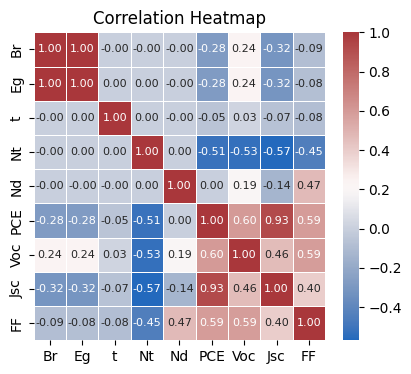

In [3]:
df1=df.iloc[:,1:]
corr_matrix = df1.corr()

# Step 4: Draw the heatmap
plt.figure(figsize=(4.7, 4))  # Optional: Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5,  annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.savefig('Correlation.png', dpi=300, bbox_inches='tight')
plt.show()

#Data Prep

In [4]:
dfx=df.iloc[:,1:-4]
X=dfx.values
y_eta=df.iloc[:,-4].values
y_voc=df.iloc[:,-3].values
y_jsc=df.iloc[:,-2].values
y_ff=df.iloc[:,-1].values
y_eta=y_eta.reshape(len(y_eta),1)
y_voc=y_voc.reshape(len(y_voc),1)
y_jsc=y_jsc.reshape(len(y_jsc),1)
y_ff=y_ff.reshape(len(y_ff),1)
dfx

,Br,Eg,t,Nt,Nd
0,0.0,1.55,0.3,1.000000e+12,1.000000e+14
1,0.0,1.55,0.3,1.000000e+12,1.000000e+15
2,0.0,1.55,0.3,1.000000e+12,1.000000e+16
3,0.0,1.55,0.3,1.000000e+12,1.000000e+17
4,0.0,1.55,0.3,1.000000e+12,1.000000e+18
...,...,...,...,...,...
3235,2.5,2.07,1.0,1.000000e+17,1.000000e+15
3236,2.5,2.07,1.0,1.000000e+17,1.000000e+16
3237,2.5,2.07,1.0,1.000000e+17,1.000000e+17
3238,2.5,2.07,1.0,1.000000e+17,1.000000e+18


#Supervised Learning

##Random Forest Algorithm Training

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Efficiency Model
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_eta, test_size=0.2, random_state=100)
rf_eta = RandomForestRegressor(random_state=100)
rf_eta.fit(X_train1, y_train1)
mse_scores1 = cross_val_score(estimator=rf_eta, X=X_train1, y=y_train1, cv=5, scoring='neg_mean_squared_error')
rmse_scores1 = np.sqrt(-mse_scores1)

# Print results
print("RMSE_eta: {:.4f}".format(rmse_scores1.mean()))
print("Standard_Deviation_eta: {:.4f}".format(rmse_scores1.std()))


RMSE_eta: 0.2534
Standard_Deviation_eta: 0.0348


In [6]:
#Voc Model
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y_voc, test_size=0.2,  random_state=100)
rf_voc = RandomForestRegressor(random_state=100)
rf_voc.fit(X_train2, y_train2)

# Calculate cross-validated RMSE
mse_scores2 = cross_val_score(estimator=rf_voc, X=X_train2, y=y_train2, cv=5, scoring='neg_mean_squared_error')
rmse_scores2 = np.sqrt(-mse_scores2)
print("RMSE_voc: {:.4f}".format(rmse_scores2.mean()))
print("Standard_Deviation_voc: {:.4f}".format(rmse_scores2.std()))

RMSE_voc: 0.0094
Standard_Deviation_voc: 0.0009


In [7]:
#Jsc Model
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y_jsc, test_size=0.2,  random_state=100)
rf_jsc = RandomForestRegressor(random_state=100)
rf_jsc.fit(X_train3, y_train3)

# Calculate cross-validated RMSE
mse_scores3 = cross_val_score(estimator=rf_jsc, X=X_train3, y=y_train3, cv=5, scoring='neg_mean_squared_error')
rmse_scores3 = np.sqrt(-mse_scores3)
print("RMSE_jsc: {:.4f}".format(rmse_scores3.mean()))
print("Standard_Deviation_jsc: {:.4f}".format(rmse_scores3.std()))

RMSE_jsc: 0.3777
Standard_Deviation_jsc: 0.0119


In [8]:
#FF Model
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y_ff, test_size=0.2,  random_state=100)
rf_ff = RandomForestRegressor(random_state=100)
rf_ff.fit(X_train4, y_train4)

# Calculate cross-validated RMSE
mse_scores4 = cross_val_score(estimator=rf_ff, X=X_train4, y=y_train4, cv=5, scoring='neg_mean_squared_error')
rmse_scores4 = np.sqrt(-mse_scores4)
print("RMSE_ff: {:.4f}".format(rmse_scores4.mean()))
print("Standard_Deviation_ff: {:.4f}".format(rmse_scores4.std()))

RMSE_ff: 1.4359
Standard_Deviation_ff: 0.2067


##Prediction on Test set

In [9]:
# Predict on the test set
y_pred1 = rf_eta.predict(X_test1)
y_pred1 = y_pred1.reshape(len(y_pred1), 1)

# Calculate correlation coefficient (R value)
r_value1 = np.corrcoef(y_test1.squeeze(), y_pred1.squeeze())[0, 1]

# Calculate evaluation metrics
print("R² on Test Set:", r2_score(y_test1, y_pred1))
print("R value:", r_value1)
print("MAE on Test Set:", mean_absolute_error(y_test1, y_pred1))
print("MSE on Test Set:", mean_squared_error(y_test1, y_pred1))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test1, y_pred1)))

R² on Test Set: 0.9993698604196765
R value: 0.9996896533066483
MAE on Test Set: 0.11653037345679045
MSE on Test Set: 0.03893664182306213
RMSE on Test Set: 0.19732369807770717


In [10]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test1.reshape(len(y_test1),1)),1))

[[14.34 14.4 ]
 [13.17 12.9 ]
 [25.01 25.2 ]
 ...
 [ 5.03  4.97]
 [ 1.61  1.79]
 [ 0.06  0.06]]


In [11]:
#Voc on test set
y_pred2=rf_voc.predict(X_test2)
y_pred2=y_pred2.reshape(len(y_pred2),1)
r_value2 = np.corrcoef(y_test2.squeeze(), y_pred2.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test2, y_pred2))
print("R value:", r_value2)
print("MAE on Test Set:", mean_absolute_error(y_test2, y_pred2))
print("MSE on Test Set:", mean_squared_error(y_test2, y_pred2))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

R2 on Test Set: 0.9975222165955607
R value: 0.9988157657402331
MAE on Test Set: 0.004674058641975508
MSE on Test Set: 6.750866867283895e-05
RMSE on Test Set: 0.008216365904269293


In [12]:
np.set_printoptions(precision=2,suppress=True)
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test2.reshape(len(y_test2),1)),1))

[[1.11 1.11]
 [1.27 1.27]
 [1.29 1.29]
 ...
 [1.11 1.1 ]
 [1.01 1.01]
 [0.73 0.7 ]]


In [13]:
#Jsc on Test set
y_pred3=rf_jsc.predict(X_test3)
y_pred3=y_pred3.reshape(len(y_pred3),1)
r_value3 = np.corrcoef(y_test3.squeeze(), y_pred3.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test3, y_pred3))
print("R value:", r_value3)
print("MAE on Test Set:", mean_absolute_error(y_test3, y_pred3))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test3, y_pred3)))

R2 on Test Set: 0.9983182722230259
R value: 0.9991633797129291
MAE on Test Set: 0.17517642901234592
RMSE on Test Set: 0.31710279068091823


In [14]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test3.reshape(len(y_test3),1)),1))

[[19.6  19.9 ]
 [12.86 12.6 ]
 [22.65 22.6 ]
 ...
 [10.35 10.3 ]
 [ 3.56  3.68]
 [ 0.31  0.29]]


In [15]:
#ff on Test set
y_pred4 = rf_ff.predict(X_test4)
y_pred4 = y_pred4.reshape(len(y_pred4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred4)))

R2 on Test Set: 0.9976252795353108
R value: 0.9988203053962224
MAE on Test Set: 0.6383601851851815
MSE on Test Set: 1.3965007341975304
RMSE on Test Set: 1.1817363217729793


In [16]:
np.set_printoptions(precision=2, suppress=True)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test4.reshape(len(y_test4),1)),1))

[[66.13 65.6 ]
 [80.72 80.8 ]
 [86.23 86.3 ]
 ...
 [41.78 43.5 ]
 [48.   48.1 ]
 [28.57 29.2 ]]


##Plot

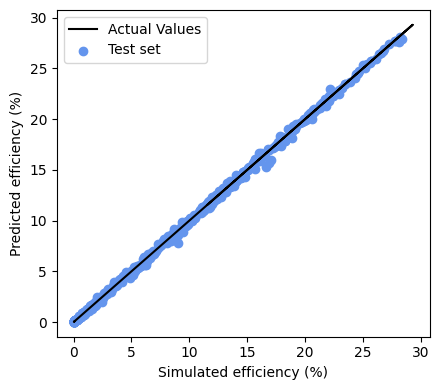

In [17]:
# Plotting the results
plt.figure(figsize=(4.5, 4))

plt.plot(y_train1, y_train1, color='black',linestyle='-', label='Actual Values')  # Diagonal reference line
plt.scatter(y_test1, y_pred1, color='cornflowerblue', label='Test set')  # Test set predictions

plt.xlabel('Simulated efficiency (%)')
plt.ylabel('Predicted efficiency (%)')
plt.legend()
#plt.title('Simulated vs Predicted efficiency')
plt.savefig('pce.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

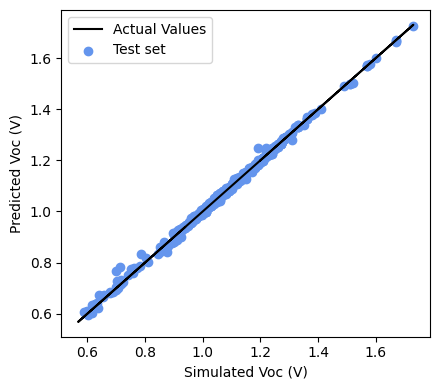

In [18]:
# Plotting the results
plt.figure(figsize=(4.5, 4))

plt.plot(y_train2, y_train2, color='black', label='Actual Values')  # Diagonal reference line
plt.scatter(y_test2, y_pred2, color='cornflowerblue', label='Test set')  # Test set predictions

plt.xlabel('Simulated Voc (V)')
plt.ylabel('Predicted Voc (V)')
plt.legend()
#plt.title('Simulated vs Predicted Voc (V)')
plt.savefig('voc.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

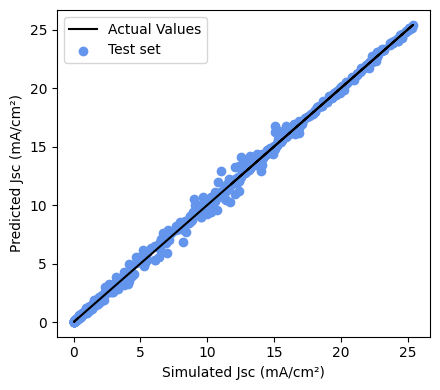

In [19]:
# Plotting the results
plt.figure(figsize=(4.5, 4))

plt.plot(y_train3, y_train3, color='black', label='Actual Values')  # Diagonal reference line
plt.scatter(y_test3, y_pred3, color='cornflowerblue', label='Test set')  # Test set predictions

plt.xlabel('Simulated Jsc (mA/cm²)')
plt.ylabel('Predicted Jsc (mA/cm²)')
plt.legend()
#plt.title('Simulated  vs Predicted Jsc (mA/cm²)')
plt.savefig('jsc.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

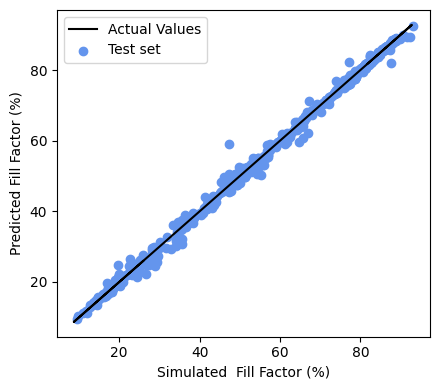

In [20]:
# Plotting the results
plt.figure(figsize=(4.5, 4))

plt.plot(y_train4, y_train4, color='black', label='Actual Values')  # Diagonal reference line
plt.scatter(y_test4, y_pred4, color='cornflowerblue', label='Test set')  # Test set predictions

plt.xlabel('Simulated  Fill Factor (%)')
plt.ylabel('Predicted Fill Factor (%)')
plt.legend()
#plt.title('Simulated  vs Predicted Fill Factor (%)')
plt.savefig('ff.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

#Efficiency analysis for Cs0.17FA0.53PbI2.6Br0.4

#For Nt=1e14 and Nd=1e17

In [21]:
material = "Cs0.17FA0.83PbI2Br1"
bandgap = 1.63
defect = 1e14
donor_density = 1e17
Br=0.4
# Create thickness values from 0.3 to 1 in steps of 0.1
thickness_values = np.arange(0.3, 1.1, 0.1)

dfn = pd.DataFrame({
    "material": [material] * len(thickness_values),
    "Br": [Br] * len(thickness_values),
    "bandgap": [bandgap] * len(thickness_values),
    "thickness": thickness_values,
    "defect": [defect] * len(thickness_values),
    "donor_density": [donor_density] * len(thickness_values)
})

# Display the DataFrame
dfn

,material,Br,bandgap,thickness,defect,donor_density
0,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.3,1.000000e+14,1.000000e+17
1,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.4,1.000000e+14,1.000000e+17
2,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.5,1.000000e+14,1.000000e+17
3,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.6,1.000000e+14,1.000000e+17
4,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.7,1.000000e+14,1.000000e+17
5,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.8,1.000000e+14,1.000000e+17
6,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.9,1.000000e+14,1.000000e+17
7,Cs0.17FA0.83PbI2Br1,0.4,1.63,1.0,1.000000e+14,1.000000e+17


In [22]:
# Predict using the Decision Tree model
eff = rf_eta.predict(dfn.drop(columns=["material"]))  # Drop non-numeric column before prediction
voc = rf_voc.predict(dfn.drop(columns=["material"]))
jsc = rf_jsc.predict(dfn.drop(columns=["material"]))
ff = rf_ff.predict(dfn.drop(columns=["material"]))

# Add predictions to the DataFrame
dfn["predicted_eff"] = eff
dfn["predicted_voc"] = voc
dfn["predicted_jsc"] = jsc
dfn["predicted_ff"] = ff

#1.641
s_eta= [15.59, 15.55, 14.59, 13.17, 11.58, 10.03, 8.59, 7.29]
s_voc= [1.183, 1.18, 1.175, 1.17, 1.164, 1.158, 1.152, 1.146]
s_jsc= [16.83, 17.21, 16.46, 15.09, 13.43, 11.73, 10.11, 8.62]
s_ff= [78.27, 76.63, 75.45, 74.68, 74.09, 73.86, 73.74, 73.72]

dfn["simulated_eff"] = s_eta
dfn["simulated_voc"] = s_voc
dfn["simulated_jsc"] = s_jsc
dfn["simulated_ff"] = s_ff
# Display the updated DataFrame
dfn


,material,Br,bandgap,thickness,defect,donor_density,predicted_eff,predicted_voc,predicted_jsc,predicted_ff,simulated_eff,simulated_voc,simulated_jsc,simulated_ff
0,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.3,1.000000e+14,1.000000e+17,15.2750,1.1875,16.5910,77.752,15.59,1.183,16.83,78.27
1,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.4,1.000000e+14,1.000000e+17,15.1960,1.1800,16.7360,76.119,15.55,1.180,17.21,76.63
2,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.5,1.000000e+14,1.000000e+17,14.3380,1.1794,16.0370,75.176,14.59,1.175,16.46,75.45
3,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.6,1.000000e+14,1.000000e+17,12.9630,1.1713,14.3780,74.403,13.17,1.170,15.09,74.68
4,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.7,1.000000e+14,1.000000e+17,11.3610,1.1690,12.9730,73.839,11.58,1.164,13.43,74.09
5,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.8,1.000000e+14,1.000000e+17,9.8164,1.1621,11.4133,73.484,10.03,1.158,11.73,73.86
6,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.9,1.000000e+14,1.000000e+17,8.3242,1.1531,9.6282,73.512,8.59,1.152,10.11,73.74
7,Cs0.17FA0.83PbI2Br1,0.4,1.63,1.0,1.000000e+14,1.000000e+17,7.2038,1.1503,8.3542,73.486,7.29,1.146,8.62,73.72


In [ ]:
dfn.to_csv("dfn1.csv", index=False)
from google.colab import files
files.download("dfn1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

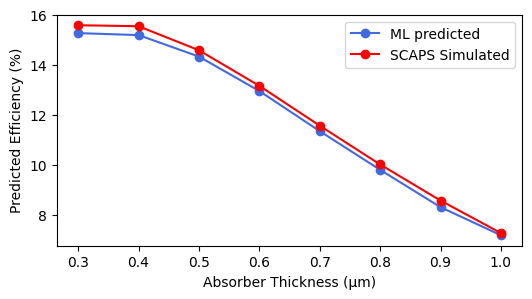

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(dfn["thickness"], dfn["predicted_eff"], marker='o', linestyle='-', color='royalblue', label='ML predicted')
plt.plot(dfn["thickness"], dfn["simulated_eff"], marker='o', linestyle='-', color='r', label='SCAPS Simulated')

plt.xlabel("Absorber Thickness (µm)")
plt.ylabel("Predicted Efficiency (%)")
#plt.title("Absorber Thickness vs. Predicted Efficiency")
#plt.ylim(17, 21)
#plt.grid(True)
plt.legend()
plt.savefig("pce1.png", dpi=300, bbox_inches='tight')
plt.show()

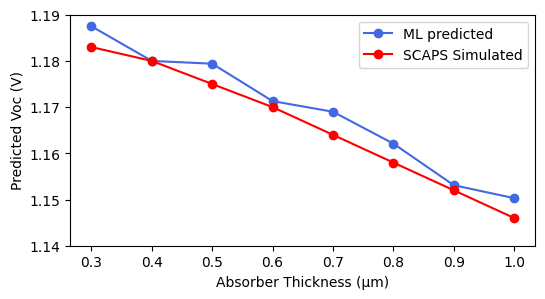

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(dfn["thickness"], dfn["predicted_voc"], marker='o', linestyle='-', color='royalblue',label='ML predicted')
plt.plot(dfn["thickness"], dfn["simulated_voc"], marker='o', linestyle='-', color='r',label='SCAPS Simulated')

plt.xlabel("Absorber Thickness (µm)")
plt.ylabel("Predicted Voc (V)")
#plt.title("Absorber Thickness vs. Predicted Voc")
plt.ylim(1.14, 1.19)
#plt.grid(True)
plt.legend()
plt.savefig("voc1.png", dpi=300, bbox_inches='tight')
plt.show()

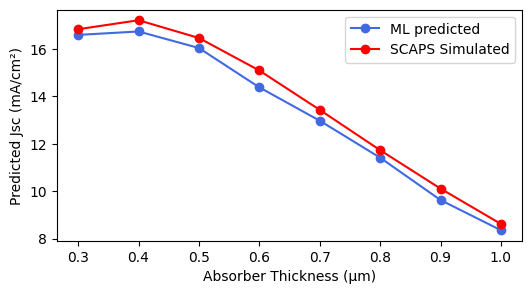

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(dfn["thickness"], dfn["predicted_jsc"], marker='o', linestyle='-', color='royalblue',label='ML predicted')
plt.plot(dfn["thickness"], dfn["simulated_jsc"], marker='o', linestyle='-', color='r',label='SCAPS Simulated')

plt.xlabel("Absorber Thickness (µm)")
plt.ylabel("Predicted Jsc (mA/cm²)")
#plt.title("Absorber Thickness vs. Predicted Jsc")
plt.legend()
plt.savefig("jsc1.png", dpi=300, bbox_inches='tight')
#plt.ylim(1.1, 1.2)
#plt.grid(True)
plt.show()

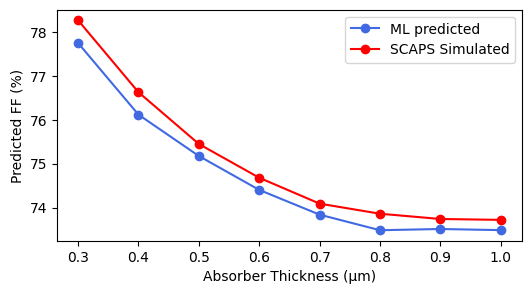

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(dfn["thickness"], dfn["predicted_ff"], marker='o', linestyle='-', color='royalblue',label='ML predicted')
plt.plot(dfn["thickness"], dfn["simulated_ff"], marker='o', linestyle='-', color='r', label='SCAPS Simulated')

plt.xlabel("Absorber Thickness (µm)")
plt.ylabel("Predicted FF (%)")
#plt.title("Absorber Thickness vs. Predicted FF")
plt.legend()
plt.savefig("ff1.png", dpi=300, bbox_inches='tight')
#plt.ylim(1.1, 1.2)
#plt.grid(True)
plt.show()

#For Nt=1e15 and Nd=1e16

In [23]:
material = "Cs0.17FA0.83PbI2Br1"
bandgap = 1.63
defect = 1e15
donor_density = 1e16
Br=0.4
# Create thickness values from 0.3 to 1 in steps of 0.1
thickness_values = np.arange(0.3, 1.1, 0.1)

dfn = pd.DataFrame({
    "material": [material] * len(thickness_values),
    "Br": [Br] * len(thickness_values),
    "bandgap": [bandgap] * len(thickness_values),
    "thickness": thickness_values,
    "defect": [defect] * len(thickness_values),
    "donor_density": [donor_density] * len(thickness_values)
})

# Display the DataFrame
dfn

,material,Br,bandgap,thickness,defect,donor_density
0,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.3,1.000000e+15,1.000000e+16
1,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.4,1.000000e+15,1.000000e+16
2,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.5,1.000000e+15,1.000000e+16
3,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.6,1.000000e+15,1.000000e+16
4,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.7,1.000000e+15,1.000000e+16
5,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.8,1.000000e+15,1.000000e+16
6,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.9,1.000000e+15,1.000000e+16
7,Cs0.17FA0.83PbI2Br1,0.4,1.63,1.0,1.000000e+15,1.000000e+16


In [24]:

# Predict using the Decision Tree model
eff = rf_eta.predict(dfn.drop(columns=["material"]))  # Drop non-numeric column before prediction
voc = rf_voc.predict(dfn.drop(columns=["material"]))
jsc = rf_jsc.predict(dfn.drop(columns=["material"]))
ff = rf_ff.predict(dfn.drop(columns=["material"]))

# Add predictions to the DataFrame
dfn["predicted_eff"] = eff
dfn["predicted_voc"] = voc
dfn["predicted_jsc"] = jsc
dfn["predicted_ff"] = ff

#1.641
s_eta= [9.36, 7.15, 5.03, 3.42, 2.32, 1.58, 1.09, 0.76]
s_voc= [1.084, 1.072, 1.061, 1.05, 1.039, 1.029, 1.019, 1.009]
s_jsc= [16.99, 16.26, 12.91, 9.19, 6.29, 4.26, 2.91, 1.02]
s_ff= [50.07, 40.99, 36.72, 35.48, 35.45, 35.92, 36.62, 37.47]

dfn["simulated_eff"] = s_eta
dfn["simulated_voc"] = s_voc
dfn["simulated_jsc"] = s_jsc
dfn["simulated_ff"] = s_ff
# Display the updated DataFrame
dfn


,material,Br,bandgap,thickness,defect,donor_density,predicted_eff,predicted_voc,predicted_jsc,predicted_ff,simulated_eff,simulated_voc,simulated_jsc,simulated_ff
0,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.3,1.000000e+15,1.000000e+16,9.03780,1.08610,16.6490,50.774,9.36,1.084,16.99,50.07
1,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.4,1.000000e+15,1.000000e+16,7.18790,1.07620,15.9020,40.931,7.15,1.072,16.26,40.99
2,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.5,1.000000e+15,1.000000e+16,5.07140,1.06560,13.1300,36.853,5.03,1.061,12.91,36.72
3,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.6,1.000000e+15,1.000000e+16,3.38000,1.05560,9.0589,35.297,3.42,1.050,9.19,35.48
4,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.7,1.000000e+15,1.000000e+16,2.33130,1.03920,6.5396,34.779,2.32,1.039,6.29,35.45
5,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.8,1.000000e+15,1.000000e+16,1.58880,1.02967,4.3536,35.653,1.58,1.029,4.26,35.92
6,Cs0.17FA0.83PbI2Br1,0.4,1.63,0.9,1.000000e+15,1.000000e+16,1.01590,1.01881,2.7428,36.266,1.09,1.019,2.91,36.62
7,Cs0.17FA0.83PbI2Br1,0.4,1.63,1.0,1.000000e+15,1.000000e+16,0.81423,1.01747,2.1705,36.864,0.76,1.009,1.02,37.47


In [ ]:
dfn.to_csv("dfn2.csv", index=False)
from google.colab import files
files.download("dfn2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

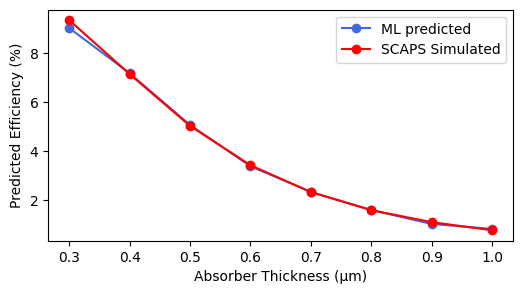

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(dfn["thickness"], dfn["predicted_eff"], marker='o', linestyle='-', color='royalblue',label='ML predicted')
plt.plot(dfn["thickness"], dfn["simulated_eff"], marker='o', linestyle='-', color='r', label='SCAPS Simulated')

plt.xlabel("Absorber Thickness (µm)")
plt.ylabel("Predicted Efficiency (%)")
#plt.title("Absorber Thickness vs. Predicted Efficiency")
#plt.ylim(17, 21)
#plt.grid(True)
plt.legend()
plt.savefig("pce2.png", dpi=300, bbox_inches='tight')
plt.show()

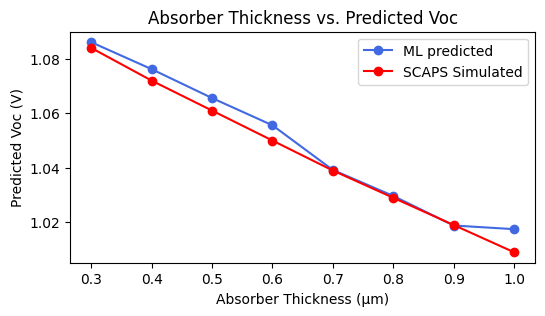

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(dfn["thickness"], dfn["predicted_voc"], marker='o', linestyle='-', color='royalblue',label='ML predicted')
plt.plot(dfn["thickness"], dfn["simulated_voc"], marker='o', linestyle='-', color='r',label='SCAPS Simulated')

plt.xlabel("Absorber Thickness (µm)")
plt.ylabel("Predicted Voc (V)")
plt.title("Absorber Thickness vs. Predicted Voc")
#plt.ylim(1.12, 1.2)
#plt.grid(True)
plt.legend()
plt.savefig("voc2.png", dpi=300, bbox_inches='tight')
plt.show()

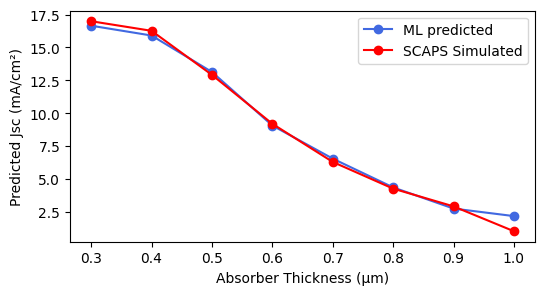

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(dfn["thickness"], dfn["predicted_jsc"], marker='o', linestyle='-', color='royalblue',label='ML predicted')
plt.plot(dfn["thickness"], dfn["simulated_jsc"], marker='o', linestyle='-', color='r',label='SCAPS Simulated')

plt.xlabel("Absorber Thickness (µm)")
plt.ylabel("Predicted Jsc (mA/cm²)")
#plt.title("Absorber Thickness vs. Predicted Jsc")
#plt.ylim(1.1, 1.2)
#plt.grid(True)
plt.legend()
plt.savefig("jsc2.png", dpi=300, bbox_inches='tight')
plt.show()

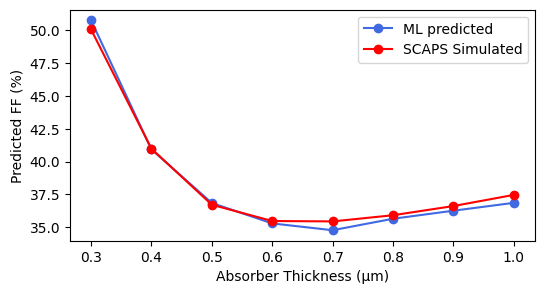

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(dfn["thickness"], dfn["predicted_ff"], marker='o', linestyle='-', color='royalblue',label='ML predicted')
plt.plot(dfn["thickness"], dfn["simulated_ff"], marker='o', linestyle='-', color='r',label='SCAPS Simulated')

plt.xlabel("Absorber Thickness (µm)")
plt.ylabel("Predicted FF (%)")
#plt.title("Absorber Thickness vs. Predicted FF")
#plt.ylim(1.1, 1.2)
#plt.grid(True)
plt.legend()
plt.savefig("ff2.png", dpi=300, bbox_inches='tight')
plt.show()

#Contour data

In [25]:
material = "Cs0.17FA0.83PbI2Br1"
bandgap = 1.63
donor_density = 1e17
Br = 0.4

# Create thickness values from 0.3 to 1 in steps of 0.1 (8 values)
thickness_values = np.arange(0.3, 1.05, 0.1)

# Defect values from 1e12 to 1e17 (6 values)
defect_values = [1e12, 1e13, 1e14, 1e15, 1e16, 1e17]

# Create a DataFrame with all combinations of thickness and defect
dfc = pd.DataFrame([
    {
        "material": material,
        "bandgap": bandgap,
        "Br": Br,
        "thickness": thickness,
        "defect": defect,
        "donor_density": donor_density
    }
    for thickness in thickness_values
    for defect in defect_values
])

# Display the DataFrame
dfc

,material,bandgap,Br,thickness,defect,donor_density
0,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.3,1.000000e+12,1.000000e+17
1,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.3,1.000000e+13,1.000000e+17
2,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.3,1.000000e+14,1.000000e+17
3,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.3,1.000000e+15,1.000000e+17
4,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.3,1.000000e+16,1.000000e+17
5,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.3,1.000000e+17,1.000000e+17
6,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.4,1.000000e+12,1.000000e+17
7,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.4,1.000000e+13,1.000000e+17
8,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.4,1.000000e+14,1.000000e+17
9,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.4,1.000000e+15,1.000000e+17


In [26]:
# Predict using the Decision Tree model
eff = rf_eta.predict(dfc.drop(columns=["material"]))  # Drop non-numeric column before prediction
voc = rf_voc.predict(dfc.drop(columns=["material"]))
jsc = rf_jsc.predict(dfc.drop(columns=["material"]))
ff = rf_ff.predict(dfc.drop(columns=["material"]))

# Add predictions to the DataFrame
dfc["predicted_eff"] = eff
dfc["predicted_voc"] = voc
dfc["predicted_jsc"] = jsc
dfc["predicted_ff"] = ff
dfc

,material,bandgap,Br,thickness,defect,donor_density,predicted_eff,predicted_voc,predicted_jsc,predicted_ff
0,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.3,1.000000e+12,1.000000e+17,16.140000,1.21370,15.62500,84.277
1,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.3,1.000000e+13,1.000000e+17,15.813000,1.19880,15.60200,84.220
2,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.3,1.000000e+14,1.000000e+17,13.695000,1.18820,14.91100,79.465
3,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.3,1.000000e+15,1.000000e+17,7.078700,1.12580,8.66900,62.435
4,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.3,1.000000e+16,1.000000e+17,1.515000,1.05084,3.49310,45.110
5,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.3,1.000000e+17,1.000000e+17,0.574090,0.90366,1.78220,40.534
6,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.4,1.000000e+12,1.000000e+17,17.808000,1.21370,17.25800,84.265
7,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.4,1.000000e+13,1.000000e+17,17.191000,1.20220,17.16300,83.958
8,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.4,1.000000e+14,1.000000e+17,13.732000,1.18630,15.09000,78.109
9,Cs0.17FA0.83PbI2Br1,1.63,0.4,0.4,1.000000e+15,1.000000e+17,5.233700,1.11450,7.41960,61.475


In [ ]:
dfc.to_csv("dfc1.csv", index=False)
from google.colab import files
files.download("dfc1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>